In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from transformers import BertTokenizer, TFBertForSequenceClassification, DistilBertTokenizer, TFDistilBertForSequenceClassification
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
5626/5626 ━━━━━━━━━━━━━━━━━━━━ 774s 137ms/step - accuracy: 0.8700 - loss: 0.3741 - val_accuracy: 0.8970 - val_loss: 0.3088
Epoch 2/5
5626/5626 ━━━━━━━━━━━━━━━━━━━━ 747s 133ms/step - accuracy: 0.8991 - loss: 0.2979 - val_accuracy: 0.8993 - val_loss: 0.3041
Epoch 3/5
5626/5626 ━━━━━━━━━━━━━━━━━━━━ 736s 131ms/step - accuracy: 0.9052 - loss: 0.2801 - val_accuracy: 0.8984 - val_loss: 0.3059
Epoch 4/5
5626/5626 ━━━━━━━━━━━━━━━━━━━━ 1006s 179ms/step - accuracy: 0.9096 - loss: 0.2665 - val_accuracy: 0.8956 - val_loss: 0.3133
Epoch 5/5
5626/5626 ━━━━━━━━━━━━━━━━━━━━ 790s 134ms/step - accuracy: 0.9157 - loss: 0.2503 - val_accuracy: 0.8953 - val_loss: 0.3190
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 34s 24ms/step
=== Classification Report LSTM ===
              precision    recall  f1-score   support

           0       0.79      0.87      0.83     10897
           1       0.33      0.06      0.11      1874
           2       0.94      0.95      0.95     32230

    accuracy                        

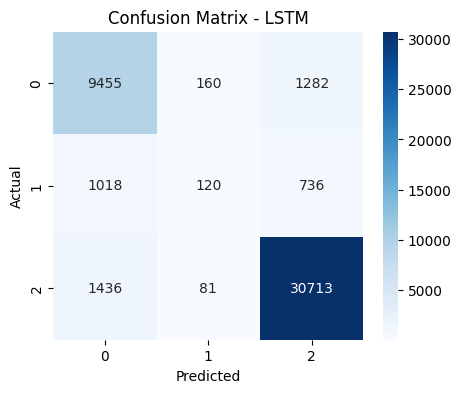

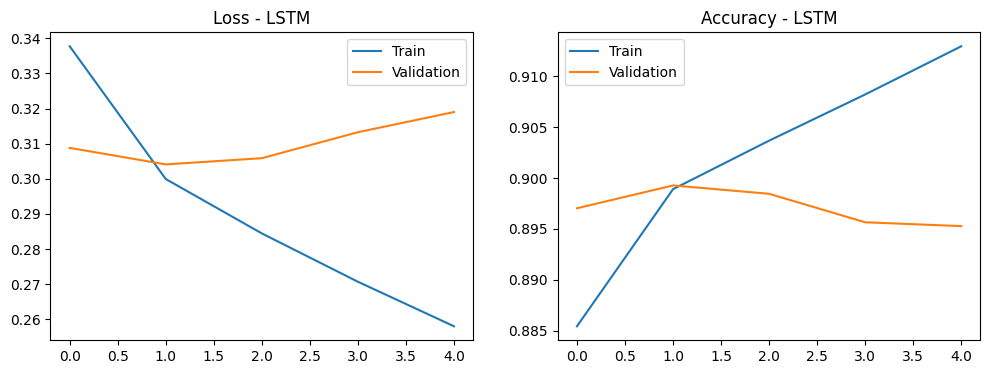

In [ ]:
# 1. Load Dataset
df = pd.read_csv('/content/Gojekk.csv')

# Preprocessing Sederhana: Mengubah score menjadi 3 kategori sentimen
def labeling(score):
    if score <= 2: return 0 # Negatif
    elif score == 3: return 1 # Netral
    else: return 2 # Positif

df['label'] = df['score'].apply(labeling)
X = df['content'].astype(str).values
y = df['label'].values

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ==========================================
# MODEL 1: NEURAL NETWORK BASE (LSTM)
# ==========================================
max_words = 5000
max_len = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_seq = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=max_len)
X_test_seq = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=max_len)

model_lstm = Sequential([
    Embedding(max_words, 128, input_length=max_len),
    LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    Dense(3, activation='softmax')
])
model_lstm.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_lstm = model_lstm.fit(X_train_seq, y_train, epochs=5, batch_size=32, validation_data=(X_test_seq, y_test))


y_pred_lstm = np.argmax(model_lstm.predict(X_test_seq), axis=1)

print("=== Classification Report LSTM ===")
print(classification_report(y_test, y_pred_lstm))


cm_lstm = confusion_matrix(y_test, y_pred_lstm)

plt.figure(figsize=(5,4))
sns.heatmap(cm_lstm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - LSTM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history_lstm.history['loss'], label='Train')
plt.plot(history_lstm.history['val_loss'], label='Validation')
plt.title('Loss - LSTM')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_lstm.history['accuracy'], label='Train')
plt.plot(history_lstm.history['val_accuracy'], label='Validation')
plt.title('Accuracy - LSTM')
plt.legend()

plt.show()


In [ ]:
# Simpan Model
model_lstm.save('model_lstm_gojek.h5')

# Simpan Tokenizer (Sangat Penting!)
import pickle
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

print("Model dan Tokenizer berhasil disimpan!")

Model dan Tokenizer berhasil disimpan!


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.


tf_model.h5:   0%|          | 0.00/656M [00:00<?, ?B/s]

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.
All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p2 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
32/32 [==============================] - 856s 26s/step - loss: 0.4549 - accuracy: 0.8200 - val_loss: 0.3062 - val_accuracy: 0.8900
Epoch 2/3
32/32 [==============================] - 815s 25s/step - loss: 0.2771 - accuracy: 0.9140 - val_loss: 0.2871 - val_accuracy: 0.8850
Epoch 3/3
7/7 [==============================] - 52s 7s/step
=== Classification Report IndoBERT ===
              precision    recall  f1-score   support

           0       0.70      1.00      0.82        37
           1       0.00      0.00      0.00         8
           2       0.98      0.93      0.95       155

    accuracy                           0.91       200
   macro avg       0.56      0.64      0.59       200
weighted avg       0.89      0.91      0.89       200



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


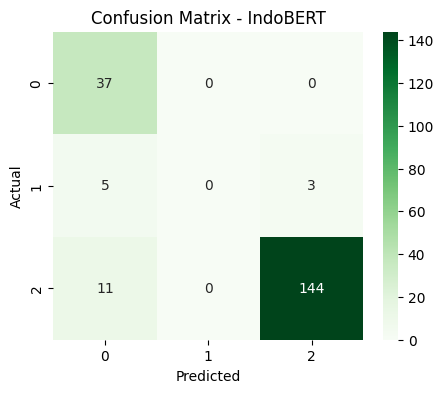

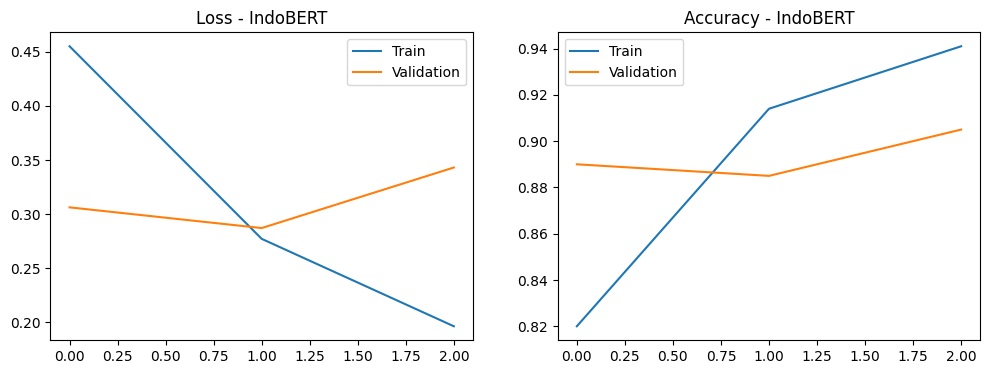

In [ ]:
from transformers import (
    BertTokenizer,
    TFBertForSequenceClassification,
    AdamWeightDecay
)
import tensorflow as tf

# ==========================
# TOKENIZER
# ==========================
tokenizer_bert = BertTokenizer.from_pretrained(
    'indobenchmark/indobert-base-p2'
)

def encode_data(texts, tokenizer):
    return tokenizer(
        list(texts),
        padding=True,
        truncation=True,
        max_length=64,
        return_tensors='tf'
    )

X_train_bert = encode_data(X_train[:1000], tokenizer_bert)
X_test_bert  = encode_data(X_test[:200], tokenizer_bert)

# ==========================
# MODEL
# ==========================
model_bert = TFBertForSequenceClassification.from_pretrained(
    'indobenchmark/indobert-base-p2',
    num_labels=3
)

# ==========================
# OPTIMIZER (WAJIB DARI TRANSFORMERS)
# ==========================
optimizer = AdamWeightDecay(
    learning_rate=2e-5,
    weight_decay_rate=0.01
)

loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metrics = ['accuracy']

model_bert.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=metrics
)

# ==========================
# TRAINING
# ==========================
history_bert = model_bert.fit(
    X_train_bert.data,
    y_train[:1000],
    epochs=3,
    validation_data=(X_test_bert.data, y_test[:200])
)

logits_bert = model_bert.predict(X_test_bert.data).logits
y_pred_bert = np.argmax(logits_bert, axis=1)


print("=== Classification Report IndoBERT ===")
print(classification_report(y_test[:200], y_pred_bert))


cm_bert = confusion_matrix(y_test[:200], y_pred_bert)

plt.figure(figsize=(5,4))
sns.heatmap(cm_bert, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - IndoBERT")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history_bert.history['loss'], label='Train')
plt.plot(history_bert.history['val_loss'], label='Validation')
plt.title('Loss - IndoBERT')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_bert.history['accuracy'], label='Train')
plt.plot(history_bert.history['val_accuracy'], label='Validation')
plt.title('Accuracy - IndoBERT')
plt.legend()

plt.show()


In [ ]:
import shutil
import os

# Tentukan path folder di Google Drive
path_gdrive_bert = '/content/drive/My Drive/model_sentiment_gojek/indobert/'

# Buat folder jika belum ada
os.makedirs(path_gdrive_bert, exist_ok=True)

# Simpan Model dan Tokenizer langsung ke path GDrive
model_bert.save_pretrained(path_gdrive_bert)
tokenizer_bert.save_pretrained(path_gdrive_bert)

print(f"Model IndoBERT berhasil disimpan di: {path_gdrive_bert}")

Model IndoBERT berhasil disimpan di: /content/drive/My Drive/model_sentiment_gojek/indobert/


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/466 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/542M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_projector.weight']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'cla

Epoch 1/3
32/32 [==============================] - 516s 16s/step - loss: 0.7327 - accuracy: 0.7080 - val_loss: 0.4324 - val_accuracy: 0.8550
Epoch 2/3
32/32 [==============================] - 486s 15s/step - loss: 0.4648 - accuracy: 0.8400 - val_loss: 0.3954 - val_accuracy: 0.8400
Epoch 3/3
7/7 [==============================] - 28s 4s/step
=== Classification Report DistilBERT ===
              precision    recall  f1-score   support

           0       0.55      0.89      0.68        37
           1       0.00      0.00      0.00         8
           2       0.96      0.87      0.92       155

    accuracy                           0.84       200
   macro avg       0.50      0.59      0.53       200
weighted avg       0.85      0.84      0.84       200



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


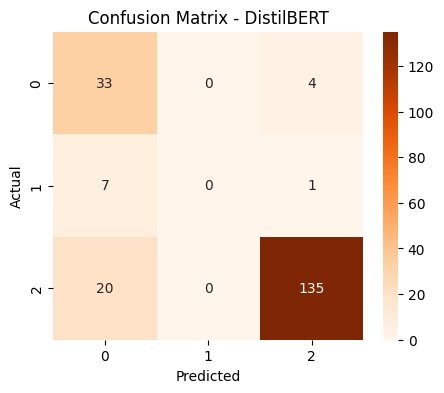

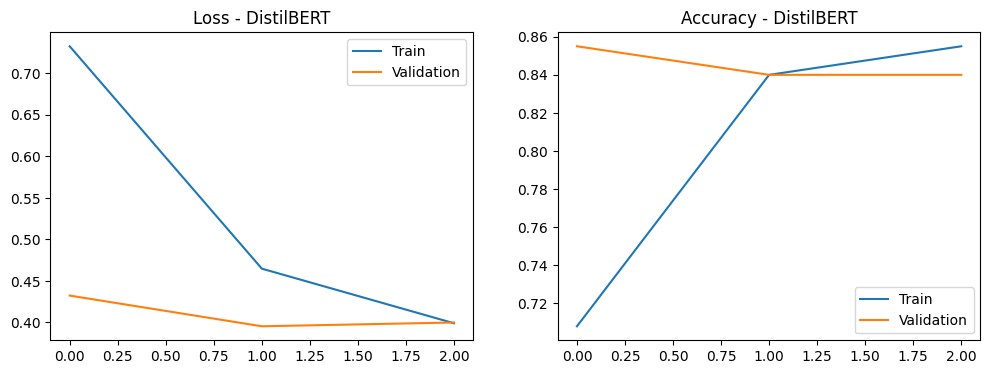

In [ ]:
from transformers import (
    DistilBertTokenizerFast,
    TFDistilBertForSequenceClassification,
    AdamWeightDecay
)
import tensorflow as tf

# ==========================
# TOKENIZER
# ==========================
tokenizer_distil = DistilBertTokenizerFast.from_pretrained(
    "distilbert-base-multilingual-cased"
)

def encode_data(texts, tokenizer):
    return tokenizer(
        list(texts),
        padding=True,
        truncation=True,
        max_length=64,
        return_tensors="tf"
    )

X_train_distil = encode_data(X_train[:1000], tokenizer_distil)
X_test_distil  = encode_data(X_test[:200], tokenizer_distil)

# ==========================
# MODEL (TF VERSION)
# ==========================
model_distil = TFDistilBertForSequenceClassification.from_pretrained(
    "distilbert-base-multilingual-cased",
    from_pt=True,          # 🔥 PENTING
    num_labels=3
)

# ==========================
# OPTIMIZER (WAJIB)
# ==========================
optimizer = AdamWeightDecay(
    learning_rate=2e-5,
    weight_decay_rate=0.01
)

loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model_distil.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=["accuracy"]
)

# ==========================
# TRAIN
# ==========================
history_distil = model_distil.fit(
    X_train_distil.data,
    y_train[:1000],
    epochs=3,
    validation_data=(X_test_distil.data, y_test[:200])
)

logits_distil = model_distil.predict(X_test_distil.data).logits
y_pred_distil = np.argmax(logits_distil, axis=1)


print("=== Classification Report DistilBERT ===")
print(classification_report(y_test[:200], y_pred_distil))


cm_distil = confusion_matrix(y_test[:200], y_pred_distil)

plt.figure(figsize=(5,4))
sns.heatmap(cm_distil, annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix - DistilBERT")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history_distil.history['loss'], label='Train')
plt.plot(history_distil.history['val_loss'], label='Validation')
plt.title('Loss - DistilBERT')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_distil.history['accuracy'], label='Train')
plt.plot(history_distil.history['val_accuracy'], label='Validation')
plt.title('Accuracy - DistilBERT')
plt.legend()

plt.show()




In [ ]:
# Tentukan path folder di Google Drive
path_gdrive_distil = '/content/drive/My Drive/model_sentiment_gojek/distilbert/'

# Buat folder jika belum ada
os.makedirs(path_gdrive_distil, exist_ok=True)

# Simpan Model dan Tokenizer langsung ke path GDrive
model_distil.save_pretrained(path_gdrive_distil)
tokenizer_distil.save_pretrained(path_gdrive_distil)

print(f"Model DistilBERT berhasil disimpan di: {path_gdrive_distil}")

Model DistilBERT berhasil disimpan di: /content/drive/My Drive/model_sentiment_gojek/distilbert/
